In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import mantis_core.rock_physics as manRP
import mantis_core.rock_physics.fluid as manFL
from mantis_core.rock_physics.fluid_presets import presets as manPResets
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('seaborn-v0_8-notebook')
import numpy as np

In [3]:
water = manRP.fluid.Fluid.from_presets(name="Water", temperature=30, pressure=25)
co2 = manRP.fluid.Fluid.from_presets(name="CarbonDioxide", temperature=30, pressure=25)
water_co2_mix = manRP.fluid.FluidMix(fluid1=water, fluid2=co2)

In [4]:
in_situ = {"Vp": 3.8, "Vs": 1.8, "Rho": 2.5}
water_co2_mix.saturation = 1
parameters = {
    "Phi": 0.2,
    "Km": 37.5,
    "fluid": water_co2_mix,
    "permeability": 1e-12,
    "patch_size": 0.0001,
    "bubble_radius": 0.0005,
    "Q_sls":10,
    "Log_omega_ref":0,
    "crack_density": 0.1,
    "aspect_ratio": 0.001,
    "eps": 0.1,
    # "tau": np.log10(1 / 2 / np.pi / 35),
    "tau":10
}

pars = {**in_situ, **parameters}

In [6]:
calibrated

{'sls': Model(low_freq_cij=
 [[32.49 17.91 17.91  0.    0.    0.  ]
  [17.91 32.49 17.91  0.    0.    0.  ]
  [17.91 17.91 32.49  0.    0.    0.  ]
  [ 0.    0.    0.    7.29  0.    0.  ]
  [ 0.    0.    0.    0.    7.29  0.  ]
  [ 0.    0.    0.    0.    0.    7.29]], Q=10.00, log_freq=0.00),
 'gassmann': Model(Phi = 0.2, fluid = FluidMix(fluid1=Fluid(name='Water', modulus=2.43, viscosity=0.000798, density=1.01), fluid2=Fluid(name='CarbonDioxide', modulus=0.374, viscosity=9.86e-05, density=0.928)), Kd = 23.75024102425668, Km = 37.5, Mu = 8.100000000000001)),
 'crm1d': Model(Phi=0.2, fluid=FluidMix(fluid1=Fluid(name='Water', modulus=2.43, viscosity=0.000798, density=1.01), fluid2=Fluid(name='CarbonDioxide', modulus=0.374, viscosity=9.86e-05, density=0.928)), Kd=23.75024102425668, Km=37.5, Mu=8.100000000000001, permeability=1e-12, patch_size=0.0001),
 'crm3d': Model(Phi=0.2, fluid=FluidMix(fluid1=Fluid(name='Water', modulus=2.43, viscosity=0.000798, density=1.01), fluid2=Fluid(name='Car

In [5]:

models = {
    str(model.__name__).split(".")[-1]: {
        "name": model.Model.name,
        "type": model.Model.model_type.split(","),
    }
    for model in manRP.model_factory.ModelsBuild.models
}
calibrated = {model: manRP.models(identifier=model, **pars) for model in models}

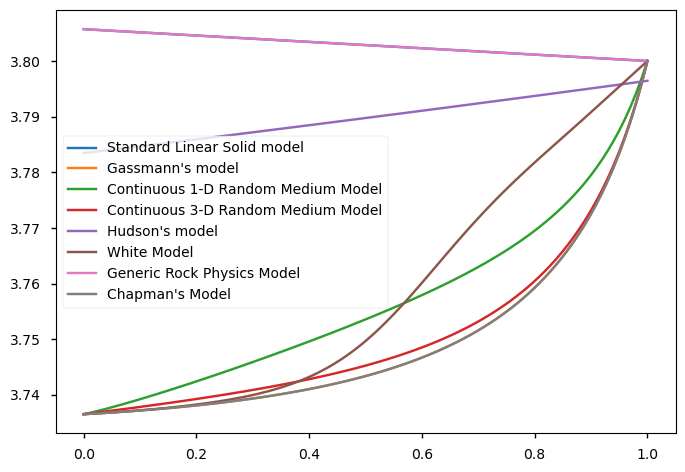

In [56]:
s = np.linspace(0, 1, 100)
water_co2_mix.saturation = 1
density = manRP.density.Density.from_insitu(Rho=in_situ["Rho"], fluid=water_co2_mix,Rho_d=2.65)

fig, ax = plt.subplots()
data = np.empty((len(calibrated), len(s)))
for j, sat in enumerate(s):
    water_co2_mix.saturation = sat
    for i, model in enumerate(calibrated.items()):
        m, v = model
        data[i, j] = np.sqrt(np.real(v.Cij()[0,0] / density()))
for i, d in enumerate(data):
    ax.plot(s, d, label=calibrated[list(calibrated.keys())[i]].name)
ax.legend()
plt.show()
plt.close()

In [47]:
calibrated["hudson"].Cij()

array([[36.0322865 , 19.8322865 , 19.77716295,  0.        ,  0.        ,
         0.        ],
       [19.8322865 , 36.0322865 , 19.77716295,  0.        ,  0.        ,
         0.        ],
       [19.77716295, 19.77716295, 35.87716494,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  6.4067101 ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  6.4067101 ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         8.1       ]])

In [50]:
[val.Cij(omega=0)[0,0] for model, val in calibrated.items()]

[(36.1+3.6100000000000017j),
 36.1,
 36.1,
 36.1,
 36.0322864998137,
 36.1,
 36.1,
 (36.1+0j)]

In [84]:
for model in manRP.model_factory.ModelsBuild.models:
    if " frequency-independent" in model.Model.model_type.split(","):
        print(model.Model.reference) 


        - Gassmann, F. (1951). 
            'Uber die Elastizitat poroser Medien.'
            Vierteljahrsschrift der Naturforschenden Gesellschaft in Zurich, 96, 1-23.
        
        also see:
        
        - Berryman, James G. 
            'Origin of Gassmann's equations.' 
            Geophysics 64.5 (1999): 1627-1629.
    

    Hudson, John A. 
    "Wave speeds and attenuation of elastic waves 
    in material containing cracks." 
    Geophysical Journal International 64.1 (1981): 133-150.

    

    placeholder (identity) model
    
